In [1]:
from IPython.display import Image 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

# 비지도 학습 (Unsupervised Learning)

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속합니다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않습니다**.

- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가 (실루엣 스코어)

## 군집화



[K-Means 알고리즘 동작원리](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

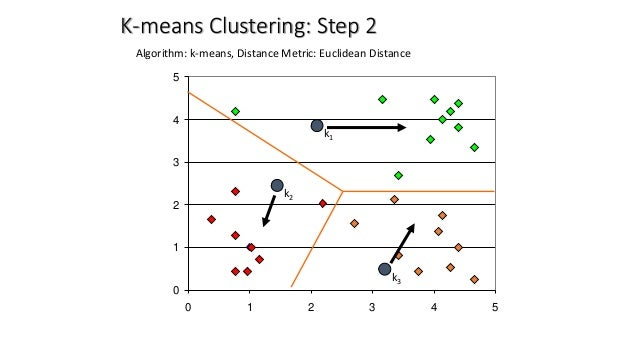

In [3]:
Image('https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

### K-Means Clustering

- 군집화에서 가장 대중적으로 사용되는 알고리즘입니다. 

- **centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화** 기법입니다.

- 뒤섞여 있는 데이터를 원하는 갯수로 군집화 합니다.

**사용되는 예제**

- 스팸 문자 분류
- 뉴스 기사 분류

In [2]:
from sklearn.cluster import KMeans

In [3]:
raw_data = [[7,1], [2,1], [4,2], [9,4], [10,5], [10,6], [11,5], [11,6], [15,3], [15,2] ,[16,4], [16,1]]
df = pd.DataFrame(columns=('x', 'y'))

df = pd.DataFrame(raw_data,columns=('x', 'y'))
df

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


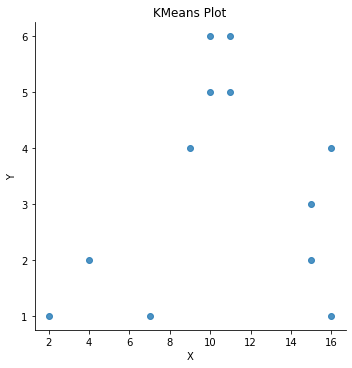

In [6]:
sns.lmplot('x', 'y', data=df, fit_reg=False)#fit_reg는 회귀선을 그릴지의 여부
plt.title('KMeans Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
data_point = df.values
data_point

array([[ 7,  1],
       [ 2,  1],
       [ 4,  2],
       [ 9,  4],
       [10,  5],
       [10,  6],
       [11,  5],
       [11,  6],
       [15,  3],
       [15,  2],
       [16,  4],
       [16,  1]], dtype=int64)

In [10]:
km.fit_transform(data_point)
km.labels_

array([1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0])

In [12]:
df['cluster_id'] = km.labels_
df

,x,y,cluster_id
0,7,1,1
1,2,1,1
2,4,2,1
3,9,4,2
4,10,5,2
5,10,6,2
6,11,5,2
7,11,6,2
8,15,3,0
9,15,2,0


In [14]:
centers = km.cluster_centers_
print(centers)

[[15.5         2.5       ]
 [ 4.33333333  1.33333333]
 [10.2         5.2       ]]


## 군집화된 데이타들의 시각화


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


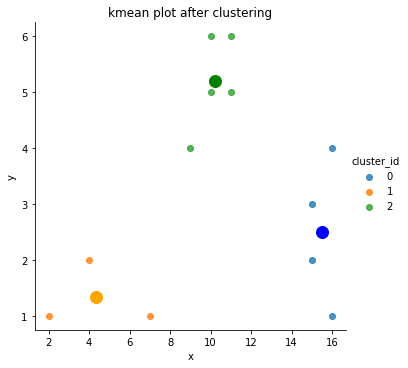

In [15]:
sns.lmplot('x', 'y', data=df, fit_reg=False,hue='cluster_id')


plt.plot(centers[0][0], centers[0][1], 'bo', markersize=12)
plt.plot(centers[1][0], centers[1][1], 'o', color='orange', markersize=12)
plt.plot(centers[2][0], centers[2][1], 'go', markersize=12)

plt.title('kmean plot after clustering')
plt.show()

## IRIS 데이타를 이용한 KMeans Clustering

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()

kmeans = KMeans(n_clusters=3, max_iter=500)

cluster = kmeans.fit_transform(iris['data'])
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [25]:
centers_iris = kmeans.cluster_centers_
centers_iris

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 시각화

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


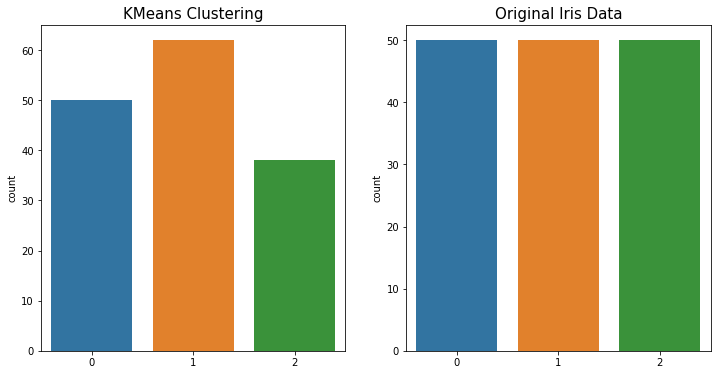

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.countplot(kmeans.labels_)
plt.title('KMeans Clustering', fontsize=15)

plt.subplot(1, 2, 2)
sns.countplot(iris['target'])
plt.title('Original Iris Data', fontsize=15)

plt.show()

<Figure size 720x576 with 0 Axes>

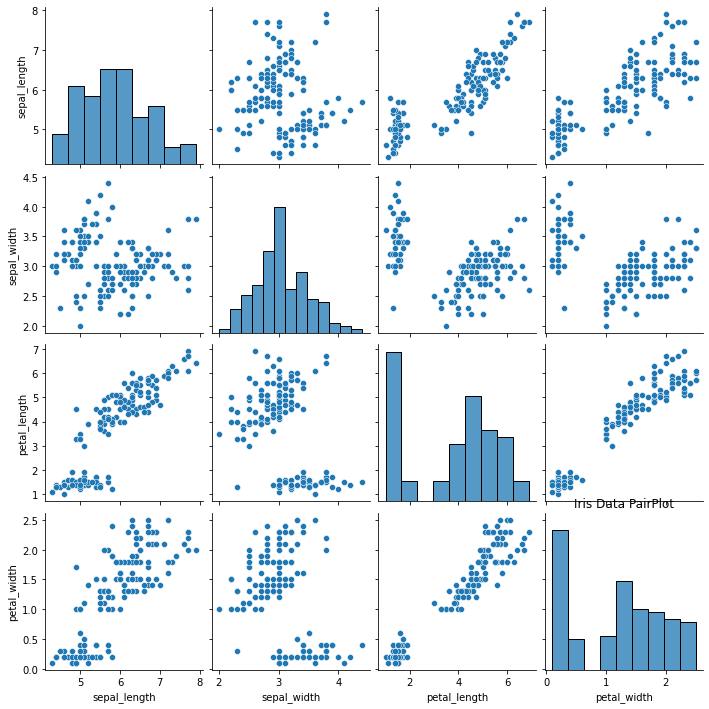

In [29]:
iris2 = sns.load_dataset('iris')

plt.figure(figsize=(10,8))
sns.pairplot(iris2)
plt.title('Iris Data PairPlot')
plt.show()

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


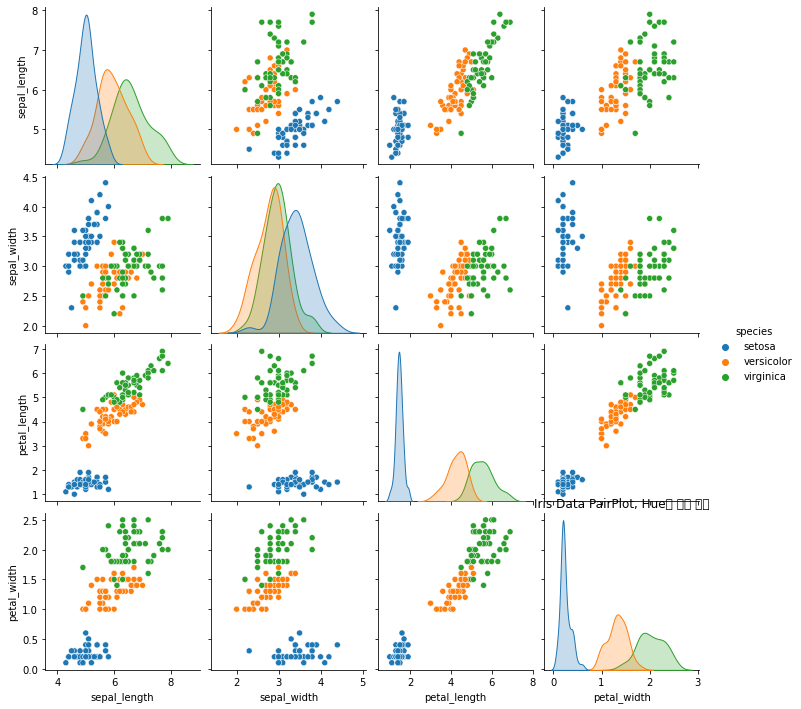

In [30]:
sns.pairplot(iris2, hue='species')
plt.title('Iris Data PairPlot, Hue에 따른 비교')
plt.show()